<a href="https://colab.research.google.com/github/SasikiranJ/Mini_Project/blob/master/Mini_project-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Create a connection for google Drive and google colab**

In [0]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# shearable link id of the file in the google drive
download = drive.CreateFile({'id': '1xX6BJskLTQmOwu4N7icPXPGFuSMu_8gq'})
download1 = drive.CreateFile({'id': '1QJBbApwvJPJpUeT708sMW5Sg4u0nMktF'})

#Download that file into google colab
download.GetContentFile('My Dataset.zip')
download1.GetContentFile('sample.zip')

# **Create a connection for accessing the colab file system**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **command for to see the list of files in google colab file system**

In [3]:
!ls

 adc.json   drive  'My Dataset.zip'   sample_data   sample.zip


# **Unzip the zip file for accessing the image files**

In [4]:
#unzip the files in the colab file system
!unzip "/content/My Dataset.zip" -d "/content/dataset"
!unzip "/content/sample.zip" -d "/content/sample"

Archive:  /content/My Dataset.zip
   creating: /content/dataset/My Dataset/
   creating: /content/dataset/My Dataset/validation/
   creating: /content/dataset/My Dataset/test/
   creating: /content/dataset/My Dataset/train/
   creating: /content/dataset/My Dataset/validation/genuine/
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-01004010.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-01003010.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-01002010.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-01001010.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-00904009.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-00903009.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-00902009.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-00901009.png  
  inflating: /content/dataset/My Dataset/validation/genuine/NFI-00805008.png  
  in

In [5]:
!ls

 adc.json   drive	      sample	    sample.zip
 dataset   'My Dataset.zip'   sample_data


# **Image preprocessing technique(Resizing image)**

In [6]:
import os
from PIL import Image
import sys

#Directories in which contain our image files
directory_list =  [	"/content/dataset/My Dataset/test/forged",
                  	"/content/dataset/My Dataset/test/genuine",
										"/content/dataset/My Dataset/train/forged",
										"/content/dataset/My Dataset/train/genuine",
										"/content/dataset/My Dataset/validation/forged",
										"/content/dataset/My Dataset/validation/genuine"
									]

#processing each image and resizing that image and save into the same location 
for directory in directory_list:
	for file_name in os.listdir(directory):
		print("processing %s" % file_name)
		image = Image.open(os.path.join(directory, file_name))
		newdim = (224,224)
		output = image.resize(newdim,Image.ANTIALIAS)
		output_file_name = os.path.join(directory, file_name)
		output.save(output_file_name,quality = 90)

print("ALL DONE")



processing 04_0204050.PNG
processing 04_0110058.PNG
processing NFI-00401024.png
processing 02_0125050.PNG
processing 03_0106052.PNG
processing NFI-00105028.PNG
processing NFI-01102016.png
processing 03_0208057.PNG
processing 01_0107053.PNG
processing NFI-00304005.png
processing NFI-00702023.png
processing NFI-00502022.png
processing 04_0105056.PNG
processing NFI-02502010.png
processing 03_0210052.PNG
processing 02_0126060.PNG
processing NFI-08804004.png
processing 01_0117057.PNG
processing 04_0212067.PNG
processing 04_0108063.PNG
processing 03_0120051.PNG
processing 03_0212067.PNG
processing 02_0120051.PNG
processing 02_0207053.PNG
processing 01_0127066.PNG
processing 02_0126050.PNG
processing NFI-00401013.png
processing 01_0208057.PNG
processing 01_0214054.PNG
processing NFI-00105025.PNG
processing 03_0202055.PNG
processing 01_0207052.PNG
processing NFI-01104012.png
processing NFI-00301009.png
processing NFI-01104016.png
processing NFI-00402013.png
processing 02_0106052.PNG
processing

# **Importing libraries**


In [0]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.utils.multiclass import unique_labels
%matplotlib inline
import math  
import datetime
import time

np.set_printoptions(threshold=sys.maxsize)



# **Declaring variables**
# like batch size,no of epochs,weight file name(.h5 file),image width and height

# 1 training iteration = 1 epoch = Forward pass + Backpropagation 

In [0]:
#Default dimensions we found online
img_width, img_height = 224,224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = '/content/dataset/My Dataset/train'  
validation_data_dir = '/content/dataset/My Dataset/validation'  
test_data_dir = '/content/dataset/My Dataset/test'
 
# batch size used by flow_from_directory and predict_generator  
batch_size = 50

#No of training iterations
epochs = 18

# **Importing the VGG16 model**

In [9]:
vgg16 = applications.vgg16.VGG16(include_top=False, weights='imagenet')





58892288/58889256 [==============================] - 1s 0us/step








# **Extracting the image features by using vgg16 model**
# Features stored in the form of a weight matrix and store that matrix in the file named as .npy file

In [10]:

start = datetime.datetime.now()

datagen = ImageDataGenerator(rescale=1. / 255)

#Training Data
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)    
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
"""print(nb_train_samples)
print(num_classes)
print(predict_size_train)""" 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
np.save('bottleneck_features_train.npy', bottleneck_features_train)




# Validation data

generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)   
nb_validation_samples = len(generator.filenames)   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
"""print(nb_validation_samples)
print(num_classes)
print(predict_size_validation)"""  
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation) 
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 




# Test Data

generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)    
nb_test_samples = len(generator.filenames)   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
"""print(nb_test_samples)
print(num_classes)
print(predict_size_test)"""
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
#print(bottleneck_features_test)
np.save('bottleneck_features_test.npy', bottleneck_features_test) 


end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Found 6262 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 1566 images belonging to 2 classes.
Time:  0:01:26.460766


# **Load features and mapping to respective labels**

In [244]:
start = datetime.datetime.now()

#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
train_labels1 = train_labels
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 



#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
nb_validation_samples = len(generator_top.filenames)  
validation_data = np.load('bottleneck_features_validation.npy')  
validation_labels = generator_top.classes  
validation_labels1 = validation_labels
#print(validation_labels)
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 
#print(validation_labels)



#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
nb_test_samples = len(generator_top.filenames)  
test_data = np.load('bottleneck_features_test.npy')  
test_labels = generator_top.classes
test_labels1 = test_labels 
#print(test_labels)
test_labels = to_categorical(test_labels, num_classes=num_classes)
#print(test_labels)

print()
print()
print()
print("Input to our classification neural network")
input_shape=train_data.shape[:]
print(input_shape)

print()
print()
print()
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)


Found 6262 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 1566 images belonging to 2 classes.



Input to our classification neural network
(6262, 7, 7, 512)



Time:  0:00:00.656837


# **Finetuning the vgg16 model**


In [282]:
start = datetime.datetime.now()

#Creating our classification model for our dataset(Contain 2 labels:- Forged and genuine)
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100))
model.add(keras.layers.LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))  
model.add(Dense(50))
model.add(keras.layers.LeakyReLU(alpha=0.3))  
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='sigmoid'))

#Initiate our model with necessary parameters
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  
#code for earlystopping 
callbacks = [EarlyStopping(monitor='val_loss', patience=5,verbose=1,mode='min'),
ModelCheckpoint(filepath=top_model_weights_path, monitor='val_loss',verbose=1,save_best_only=True)]

#train the model with train data and validate with validation data
history = model.fit(train_data, train_labels,  
      epochs=22,
      callbacks=callbacks,
      batch_size=batch_size,  
      verbose=1,
      validation_data=(validation_data, validation_labels)) 

print()
print()
print()
#model.evaluate returns the loss value & metrics values for the model.
(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)
print("[INFO] validation accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] validation Loss: {}".format(eval_loss))
print("[INFO] train acc: {}".format(history.history['acc'][-1]*100))
print("[INFO] train loss: {}".format(history.history['loss'][-1]*100))



print()
print()
print()  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 6262 samples, validate on 27 samples
Epoch 1/22
6262/6262 [==============================] - 3s 492us/step - loss: 0.6337 - acc: 0.6449 - val_loss: 0.8449 - val_acc: 0.4815

Epoch 00001: val_loss improved from inf to 0.84492, saving model to bottleneck_fc_model.h5
Epoch 2/22
6262/6262 [==============================] - 1s 194us/step - loss: 0.5216 - acc: 0.7478 - val_loss: 0.6820 - val_acc: 0.6481

Epoch 00002: val_loss improved from 0.84492 to 0.68195, saving model to bottleneck_fc_model.h5
Epoch 3/22
6262/6262 [==============================] - 1s 194us/step - loss: 0.4394 - acc: 0.8021 - val_loss: 0.6795 - val_acc: 0.7037

Epoch 00003: val_loss improved from 0.68195 to 0.67950, saving model to bottleneck_fc_model.h5
Epoch 4/22
6262/6262 [==============================] - 1s 195us/step - loss: 0.3857 - acc: 0.8287 - val_loss: 0.8193 - val_acc: 0.5926

Epoch 00004: val_loss did not improve from 0.67950
Epoch 5/22
6262/6262 [==============================] - 1s 195us/step - lo

# **Classification model summary**

In [0]:
#print(train_labels)
predictions = model.predict(train_data,batch_size,verbose = 1)
print(predictions)
values = model.predict_classes(train_data,batch_size,verbose = 1)
values

In [63]:
#cm = confusion_matrix(train_labels1,values)
#cm
generator_top.class_indices

{'forged': 0, 'genuine': 1}

Text(0.5, 0, 'Predicted Label')

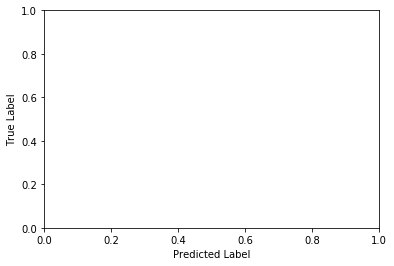

In [262]:
def plot_confusion_matrix(cm,classes,normalize=False,cmap=plt.cm.Blues):
    classes = classes
    print(cm.shape[0])
    print(cm.shape[1])
    plt.imshow(cm,cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0,size="x-large")
    plt.yticks(tick_marks,classes,size="x-large",ma="center")
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    thresh = cm.max() /2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
           plt.text(j,i,cm[i, j],ma="center",color="white",bbox=dict(facecolor='red', alpha=0.5),fontsize="xx-large")
       
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

2
2
Confusion matrix, without normalization
[[3634   32]
 [  48 2548]]


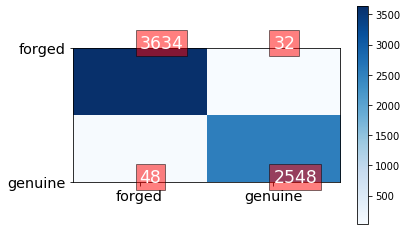

In [283]:
plot_confusion_matrix(confusion_matrix(train_labels1,values),generator_top.class_indices)

1566/1566 [==============================] - 1s 445us/step
2
2
Confusion matrix, without normalization
[[382   2]
 [486 696]]


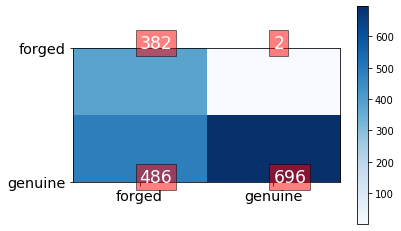

In [284]:
values1 = model.predict_classes(test_data,batch_size,verbose = 1)
plot_confusion_matrix(confusion_matrix(test_labels1,values1),generator_top.class_indices)

27/27 [==============================] - 0s 177us/step
2
2
Confusion matrix, without normalization
[[13  0]
 [ 1 13]]


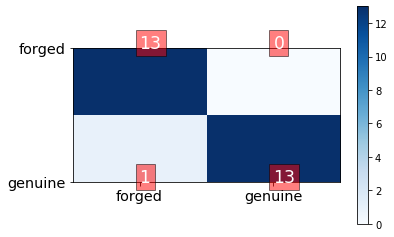

In [285]:
values2 = model.predict_classes(validation_data,batch_size,verbose = 1)
plot_confusion_matrix(confusion_matrix(validation_labels1,values2),generator_top.class_indices)

In [247]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               2508900   
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)                5050      
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 50)              

# **Visualising through graphs**

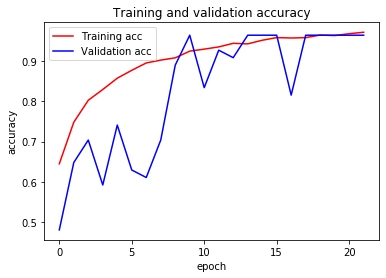

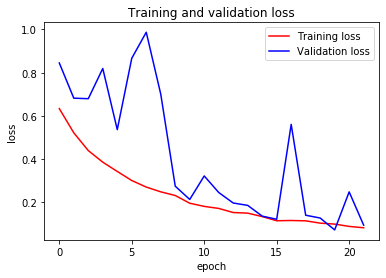

In [286]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Graph for training accuracy vs validation accuracy
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()

#Graph for training loss vs validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

# **Evaluating the model**

In [287]:
model.evaluate(test_data, test_labels)

1566/1566 [==============================] - 0s 115us/step


[1.6578423483047449, 0.6861430393629452]

# **predict the signature image file**

In [0]:
#Preprocess the predicted image
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

#function for prediction for the given image using vgg16.predict() function
def test_single_image(path):
    clas = ['forged','genuine']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, clas, x in zip(range(0,4), clas , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, clas, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  

# **prediction of 7 outsampled images**
# 2 are misclassified and 5 are properly classified

In [289]:
test_single_image("/content/sample/sample/NISDCC-001_001_001_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 95.35%
ID: 1, Label: genuine 3.9%
Final Decision:
.
..
...
ID: 0, Label: forged


In [290]:
path = "/content/sample/sample/NISDCC-002_002_002_6g.PNG"
test_single_image(path)

[INFO] loading and preprocessing image...
ID: 0, Label: forged 1.54%
ID: 1, Label: genuine 97.87%
Final Decision:
.
..
...
ID: 1, Label: genuine


In [291]:
test_single_image("/content/sample/sample/NISDCC-001_001_004_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 69.89%
ID: 1, Label: genuine 25.91%
Final Decision:
.
..
...
ID: 0, Label: forged


In [292]:
test_single_image("/content/sample/sample/NISDCC-002_002_002_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 1.54%
ID: 1, Label: genuine 97.87%
Final Decision:
.
..
...
ID: 1, Label: genuine


In [293]:
test_single_image("/content/sample/sample/NISDCC-003_003_003_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 7.69%
ID: 1, Label: genuine 91.42%
Final Decision:
.
..
...
ID: 1, Label: genuine


In [294]:
test_single_image("/content/sample/sample/NISDCC-004_004_004_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 48.81%
ID: 1, Label: genuine 48.68%
Final Decision:
.
..
...
ID: 0, Label: forged


In [295]:
test_single_image("/content/sample/sample/NISDCC-005_005_005_6g.PNG")

[INFO] loading and preprocessing image...
ID: 0, Label: forged 0.04%
ID: 1, Label: genuine 99.96%
Final Decision:
.
..
...
ID: 1, Label: genuine
